# Classifying responses by sentiment analysis

### Classifying the data

In [3]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()
df = pd.read_csv('combined_cleaned_responses.csv')

classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', return_all_scores=True)

def get_sentiment_score(text):
    scores = classifier(str(text), truncation=True)[0]
    pos = next(score['score'] for score in scores if score['label'] == 'POSITIVE')
    neg = next(score['score'] for score in scores if score['label'] == 'NEGATIVE')
    return pos - neg

df['Sentiment'] = df.iloc[:, 1].progress_apply(get_sentiment_score)
df.head()

Device set to use cpu
c:\Users\matth\anaconda3\envs\sa-env\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 4453/4453 [02:13<00:00, 33.47it/s]


,Name of Sender,Comment,Issue,Substantive / Non-Substantive,Old / New,Response ID,RGU Consideration,Sentiment
0,Kathleen Whitson,please not approve mining will profit owners w...,GEN,NS,X,1.0,NaN,-0.996358
1,Mark,environment will eventually polluted northmet ...,FIN,NS,X,1.0,NaN,-0.997060
2,Bob Woodbury,there other projects nature successful what de...,PER,NS,X,1.0,NaN,0.293022
3,Bob Woodbury,could go vein point need rely what “with techn...,PER,NS,X,1.0,NaN,-0.990121
4,Bob Woodbury,need make decision what not what think,NEPA,NS,X,1.0,NaN,-0.986888


### Plotting it

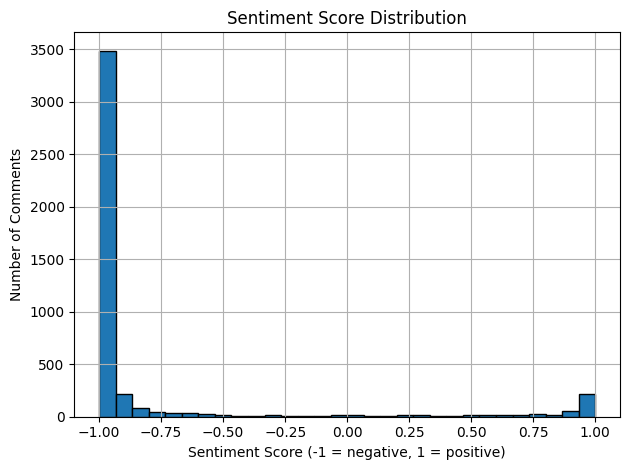

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment'], bins=30, edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score (-1 = negative, 1 = positive)')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/sentiment_distribution.png', dpi=300)
plt.show()

